# Feature Representation

### Data Mining Project 2024/25

Authors: Nicola Emmolo, Simone Marzeddu, Jacopo Raffi

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
dataset = pd.read_csv('../data/complete_dataset_fe.csv') 
dataset['date'] = pd.to_datetime(dataset['date'], format='%Y-%m-%d')

## Races

In [4]:
race_features = ['length', 'climb_total', 'climb_percentage', 'startlist_quality', 'race_physical_effort', 'race_prestige', 'points', 'race_year']

# Estrarre solo le colonne delle gare
race_data = dataset[race_features].drop_duplicates()
race_data = race_data.dropna()

scaler = StandardScaler()
race_data_scaled = scaler.fit_transform(race_data)

pca_instance = PCA()
pca_transformation = pca_instance.fit_transform(race_data_scaled)

In [5]:
# variance per component
eigenvalues = pca_instance.explained_variance_
# variance per component, scaled to sum to 1
scaled_eigenvalues = pca_instance.explained_variance_ratio_
# eigenvectors, i.e., axes of reference
eigenvectors = pca_instance.components_


# norm of the whole transformation
transformation_norm_per_column = (pca_transformation ** 2).sum(axis=0)
cumulative_norm_per_reduction = np.cumsum(transformation_norm_per_column)

pca_dataframe = pd.DataFrame.from_records(
    zip(
        eigenvalues,
        scaled_eigenvalues,
        cumulative_norm_per_reduction
    ),
    columns=["eigenvalues", "scaled_eigenvalues", "transformation_norm"]
)
pca_dataframe

eigenvalues  scaled_eigenvalues  transformation_norm
0     2.661959            0.332645          8843.028689
1     1.912919            0.239043         15197.746309
2     1.241817            0.155180         19323.062833
3     0.946951            0.118333         22468.834467
4     0.706751            0.088317         24816.661455
5     0.426373            0.053281         26233.071479
6     0.083312            0.010411         26509.834914
7     0.022325            0.002790         26584.000000

<Axes: xlabel='None', ylabel='scaled_eigenvalues'>

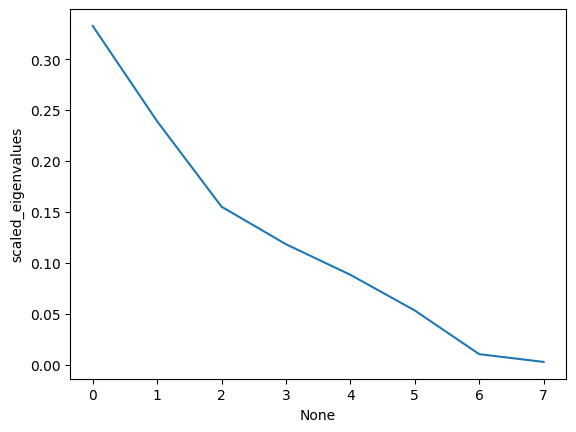

In [6]:
sb.lineplot(
    pca_dataframe,
    y="scaled_eigenvalues",
    x=pca_dataframe.index
)

In [7]:
pca_dataframe = pd.DataFrame(pca_transformation[:, :3], columns=["pca_1", "pca_2", "pca_3"])
original_and_transformed_dataframe = pd.concat(
    [
        race_data,
        pca_dataframe
    ],
    axis="columns"
)

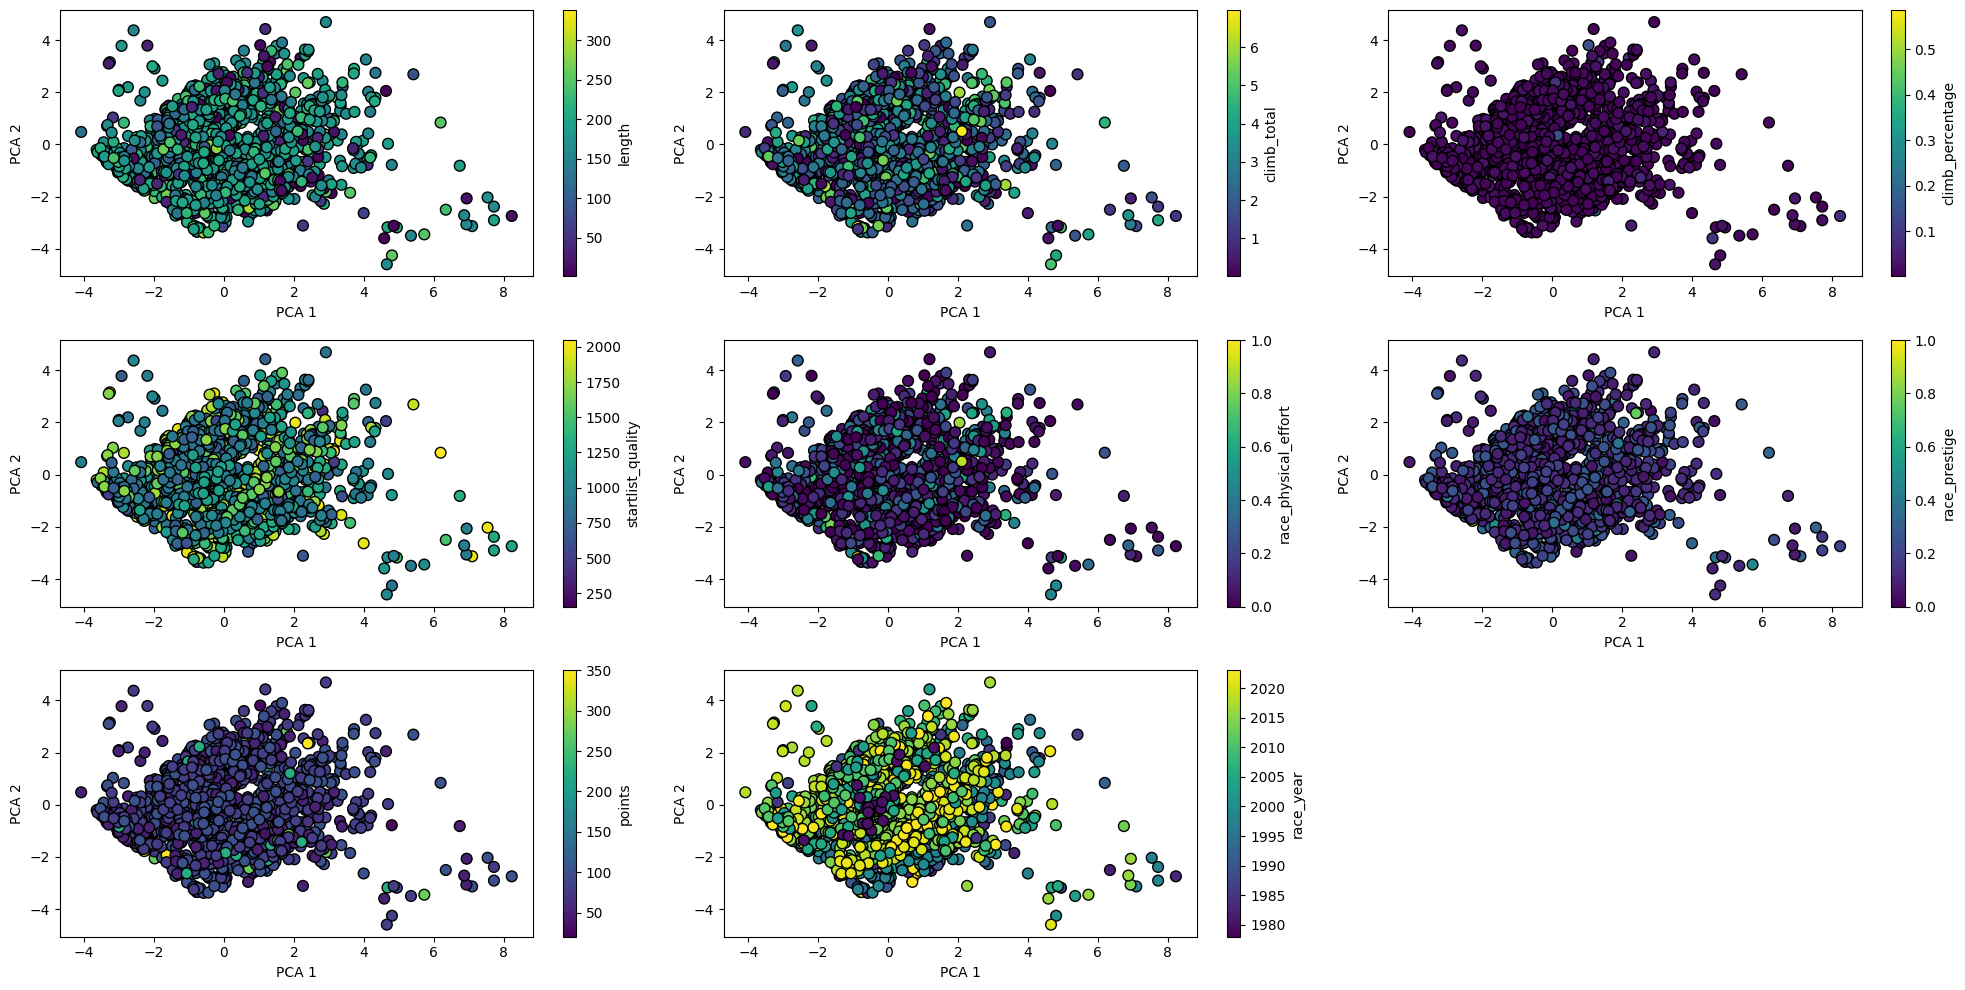

In [8]:
# Lista delle features per cui vogliamo fare gli scatter plot
features = ['length', 'climb_total', 'climb_percentage', 'startlist_quality', 'race_physical_effort', 'race_prestige', 'points', 'race_year']

# Numero di subplots (grafici da fare, uno per feature)
n_plots = len(features)

# Crea la figura per i subplots
fig, axes = plt.subplots(3, 3, figsize=(20, 10))  # Una griglia 2x3 di subplots

for i, feature in enumerate(features):
    # Determina l'asse corrispondente nel layout dei subplots
    ax = axes[i // 3, i % 3]  # Posizione nell'array 3x3
    
    # Crea uno scatter plot sui PCA_1 e PCA_2
    scatter = ax.scatter(
        original_and_transformed_dataframe['pca_1'],
        original_and_transformed_dataframe['pca_2'],
        c=original_and_transformed_dataframe[feature],  # Colora in base alla feature
        cmap='viridis',  # Cambia la palette di colori se necessario
        s=60,  # Dimensione dei punti
        edgecolor='k'  # Bordo dei punti
    )
    
    # Imposta le etichette degli assi
    ax.set_xlabel('PCA 1')
    ax.set_ylabel('PCA 2')
    
    # Aggiungi una barra di colori
    fig.colorbar(scatter, ax=ax, label=feature)

# Rimuovi l'ultimo subplot (in basso a destra) che rimarrà vuoto
fig.delaxes(axes[2, 2])

# Regola il layout per evitare sovrapposizioni
plt.tight_layout()

# Mostra i grafici
plt.show()

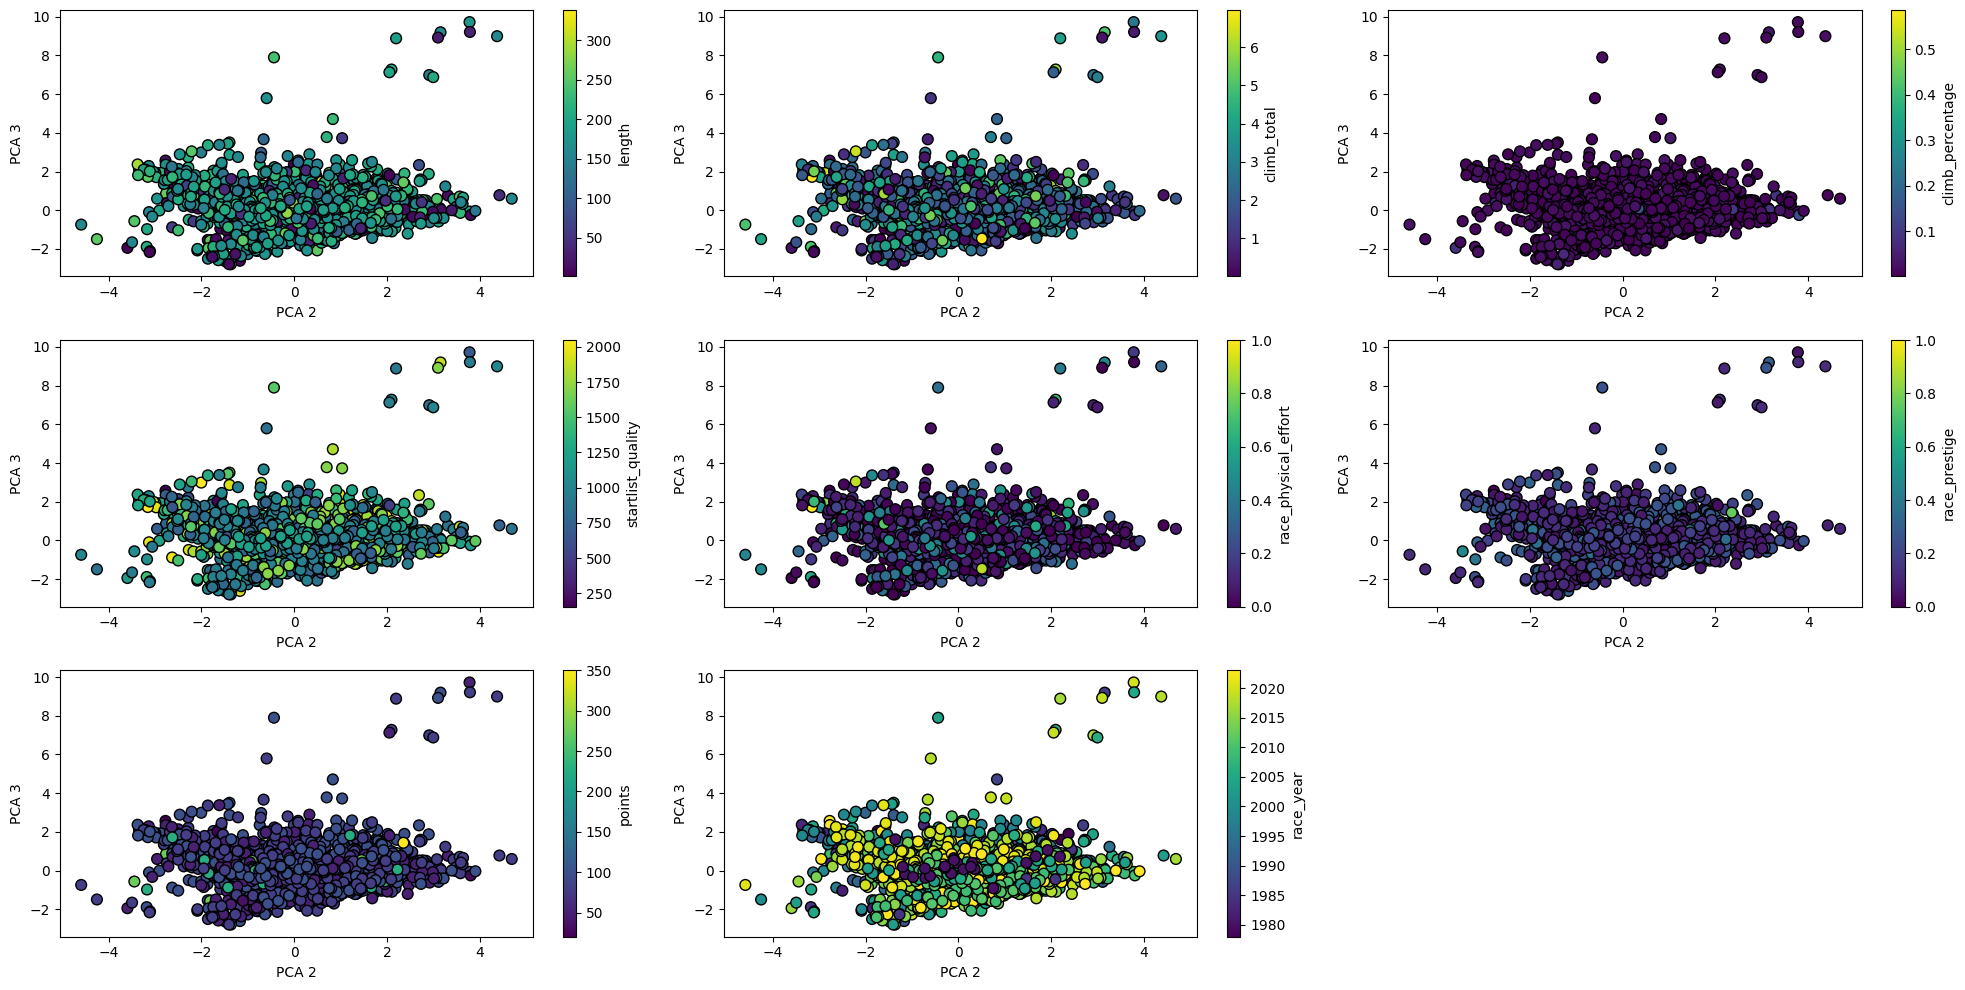

In [9]:
# Lista delle features per cui vogliamo fare gli scatter plot
features = ['length', 'climb_total', 'climb_percentage', 'startlist_quality', 'race_physical_effort', 'race_prestige', 'points', 'race_year']

# Numero di subplots (grafici da fare, uno per feature)
n_plots = len(features)

# Crea la figura per i subplots
fig, axes = plt.subplots(3, 3, figsize=(20, 10))  # Una griglia 2x3 di subplots

for i, feature in enumerate(features):
    # Determina l'asse corrispondente nel layout dei subplots
    ax = axes[i // 3, i % 3]  # Posizione nell'array 3x3
    
    # Crea uno scatter plot sui PCA_1 e PCA_2
    scatter = ax.scatter(
        original_and_transformed_dataframe['pca_2'],
        original_and_transformed_dataframe['pca_3'],
        c=original_and_transformed_dataframe[feature],  # Colora in base alla feature
        cmap='viridis',  # Cambia la palette di colori se necessario
        s=60,  # Dimensione dei punti
        edgecolor='k'  # Bordo dei punti
    )
    
    # Imposta le etichette degli assi
    ax.set_xlabel('PCA 2')
    ax.set_ylabel('PCA 3')
    
    
    # Aggiungi una barra di colori
    fig.colorbar(scatter, ax=ax, label=feature)

# Rimuovi l'ultimo subplot (in basso a destra) che rimarrà vuoto
fig.delaxes(axes[2, 2])

# Regola il layout per evitare sovrapposizioni
plt.tight_layout()

# Mostra i grafici
plt.show()

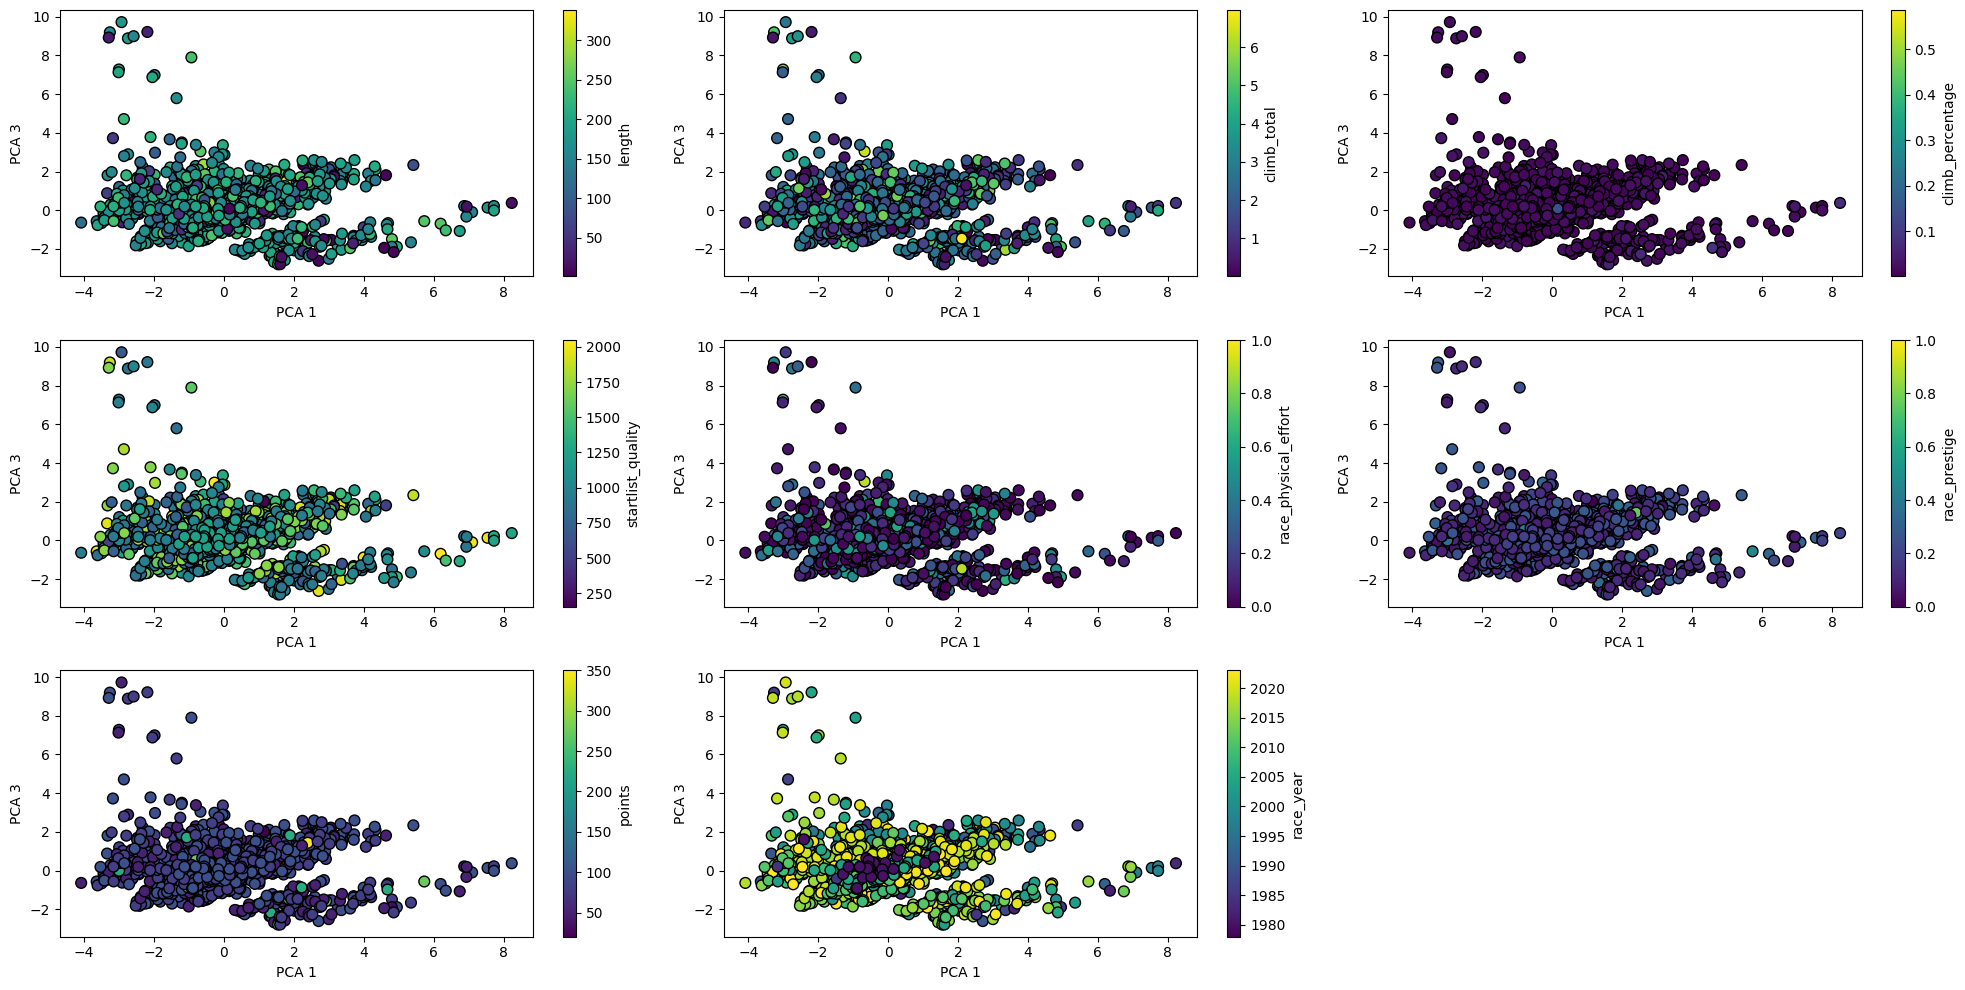

In [10]:
# Lista delle features per cui vogliamo fare gli scatter plot
features = ['length', 'climb_total', 'climb_percentage', 'startlist_quality', 'race_physical_effort', 'race_prestige', 'points', 'race_year']

# Numero di subplots (grafici da fare, uno per feature)
n_plots = len(features)

# Crea la figura per i subplots
fig, axes = plt.subplots(3, 3, figsize=(20, 10))  # Una griglia 2x3 di subplots

for i, feature in enumerate(features):
    # Determina l'asse corrispondente nel layout dei subplots
    ax = axes[i // 3, i % 3]  # Posizione nell'array 3x3
    
    # Crea uno scatter plot sui PCA_1 e PCA_2
    scatter = ax.scatter(
        original_and_transformed_dataframe['pca_1'],
        original_and_transformed_dataframe['pca_3'],
        c=original_and_transformed_dataframe[feature],  # Colora in base alla feature
        cmap='viridis',  # Cambia la palette di colori se necessario
        s=60,  # Dimensione dei punti
        edgecolor='k'  # Bordo dei punti
    )
    
    # Imposta le etichette degli assi
    ax.set_xlabel('PCA 1')
    ax.set_ylabel('PCA 3')
    
    
    # Aggiungi una barra di colori
    fig.colorbar(scatter, ax=ax, label=feature)

# Rimuovi l'ultimo subplot (in basso a destra) che rimarrà vuoto
fig.delaxes(axes[2, 2])

# Regola il layout per evitare sovrapposizioni
plt.tight_layout()

# Mostra i grafici
plt.show()

## Races-Cyclists

In [11]:
dataset = pd.read_csv('../data/complete_dataset_fe.csv') 
dataset['date'] = pd.to_datetime(dataset['date'], format='%Y-%m-%d')
dataset = dataset[dataset['race_name'] == 'Ronde van Vlaanderen']

In [12]:
# Select relevant columns for clustering
columns_to_use = ['length','race_prestige', 'race_physical_effort', 'cyclist_bmi', 'cyclist_age', 'height', 'cyclist_climb_power', 'position', 'delta']

numeric_dataset = dataset[columns_to_use].dropna()

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numeric_dataset)

pca_instance = PCA()
pca_transformation = pca_instance.fit_transform(data_scaled)

In [13]:
# variance per component
eigenvalues = pca_instance.explained_variance_
# variance per component, scaled to sum to 1
scaled_eigenvalues = pca_instance.explained_variance_ratio_
# eigenvectors, i.e., axes of reference
eigenvectors = pca_instance.components_


# norm of the whole transformation
transformation_norm_per_column = (pca_transformation ** 2).sum(axis=0)
cumulative_norm_per_reduction = np.cumsum(transformation_norm_per_column)

pca_dataframe = pd.DataFrame.from_records(
    zip(
        eigenvalues,
        scaled_eigenvalues,
        cumulative_norm_per_reduction
    ),
    columns=["eigenvalues", "scaled_eigenvalues", "transformation_norm"]
)
pca_dataframe

eigenvalues  scaled_eigenvalues  transformation_norm
0     2.049017            0.227588          5790.522537
1     1.797502            0.199652         10870.262375
2     1.240224            0.137754         14375.134412
3     0.984965            0.109402         17158.646220
4     0.934513            0.103798         19799.580254
5     0.832014            0.092413         22150.851838
6     0.755500            0.083915         24285.896076
7     0.268729            0.029848         25045.324566
8     0.140720            0.015630         25443.000000

<Axes: xlabel='None', ylabel='scaled_eigenvalues'>

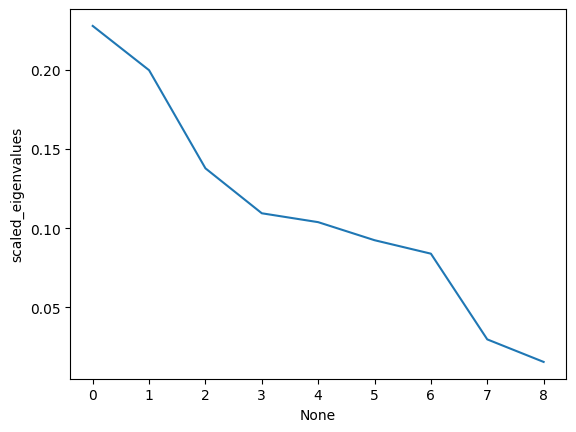

In [14]:
sb.lineplot(
    pca_dataframe,
    y="scaled_eigenvalues",
    x=pca_dataframe.index
)

In [15]:
pca_dataframe = pd.DataFrame(pca_transformation[:, :3], columns=["pca_1", "pca_2", "pca_3"]) #TODO: choose better number of PCA components
original_and_transformed_dataframe = pd.concat(
    [
        numeric_dataset,
        pca_dataframe
    ],
    axis="columns"
)

<Axes: xlabel='pca_1', ylabel='pca_2'>

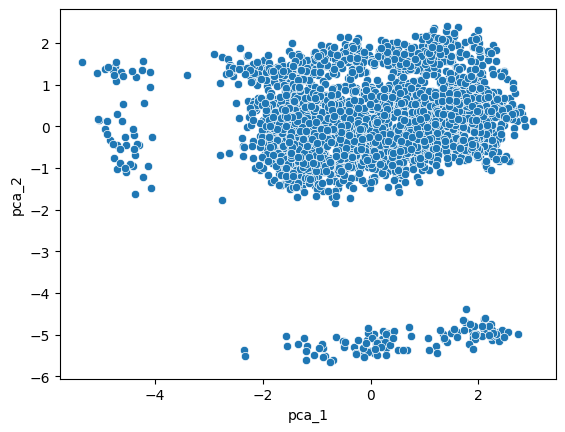

In [16]:
sb.scatterplot(
    data=original_and_transformed_dataframe,
    x='pca_1',
    y='pca_2',
)

In [17]:
original_and_transformed_dataframe[['pca_1', 'pca_2', 'position']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 5645 entries, 211 to 2826
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pca_1     2827 non-null   float64
 1   pca_2     2827 non-null   float64
 2   position  2827 non-null   float64
dtypes: float64(3)
memory usage: 176.4 KB


/tmp/ipykernel_2737/3914386192.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


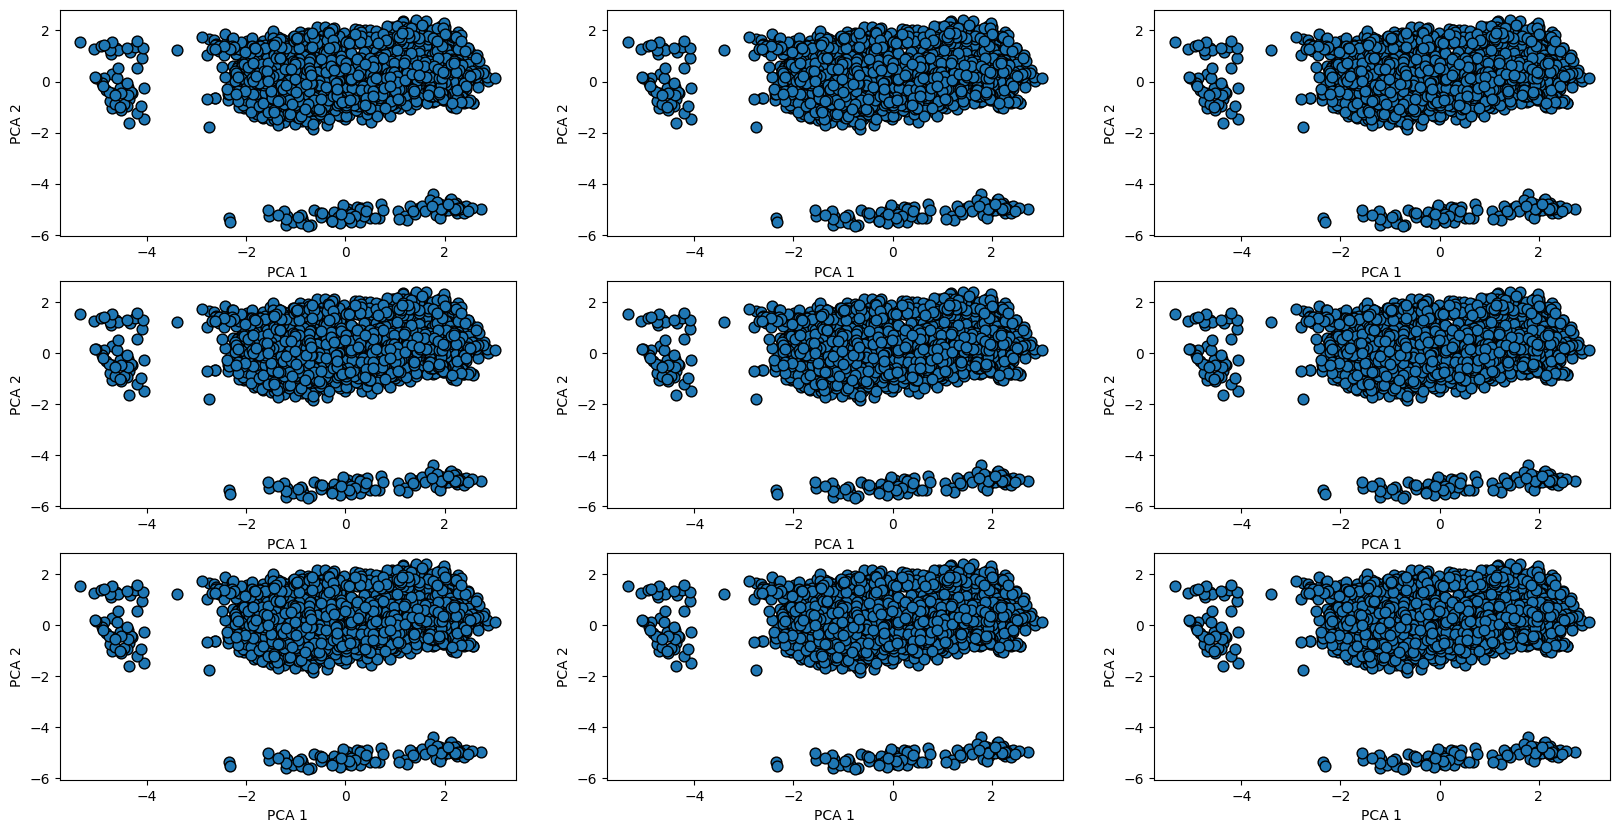

In [18]:
# Lista delle features per cui vogliamo fare gli scatter plot
features = ['length', 'race_prestige', 'race_physical_effort', 'cyclist_bmi', 'cyclist_age', 'height', 'cyclist_climb_power', 'position', 'delta']

# FIXME: fix plot (per qualche motivo con i colori non funziona)

n_plots = len(features)
fig, axes = plt.subplots(3, 3, figsize=(20, 10))  # Una griglia 2x3 di subplots

for i, feature in enumerate(features):
    ax = axes[i // 3, i % 3]  # Posizione nell'array 3x3
 
    scatter = ax.scatter(
        original_and_transformed_dataframe['pca_1'],
        original_and_transformed_dataframe['pca_2'],
        #c=original_and_transformed_dataframe[feature],  # Colora in base alla feature
        cmap='viridis',  # Cambia la palette di colori se necessario
        s=60,  # Dimensione dei punti
        edgecolor='k'  # Bordo dei punti
    )
    ax.set_xlabel('PCA 1')
    ax.set_ylabel('PCA 2')
    
    #fig.colorbar(scatter, ax=ax, label=feature)
plt.show()

/tmp/ipykernel_2737/3575696351.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


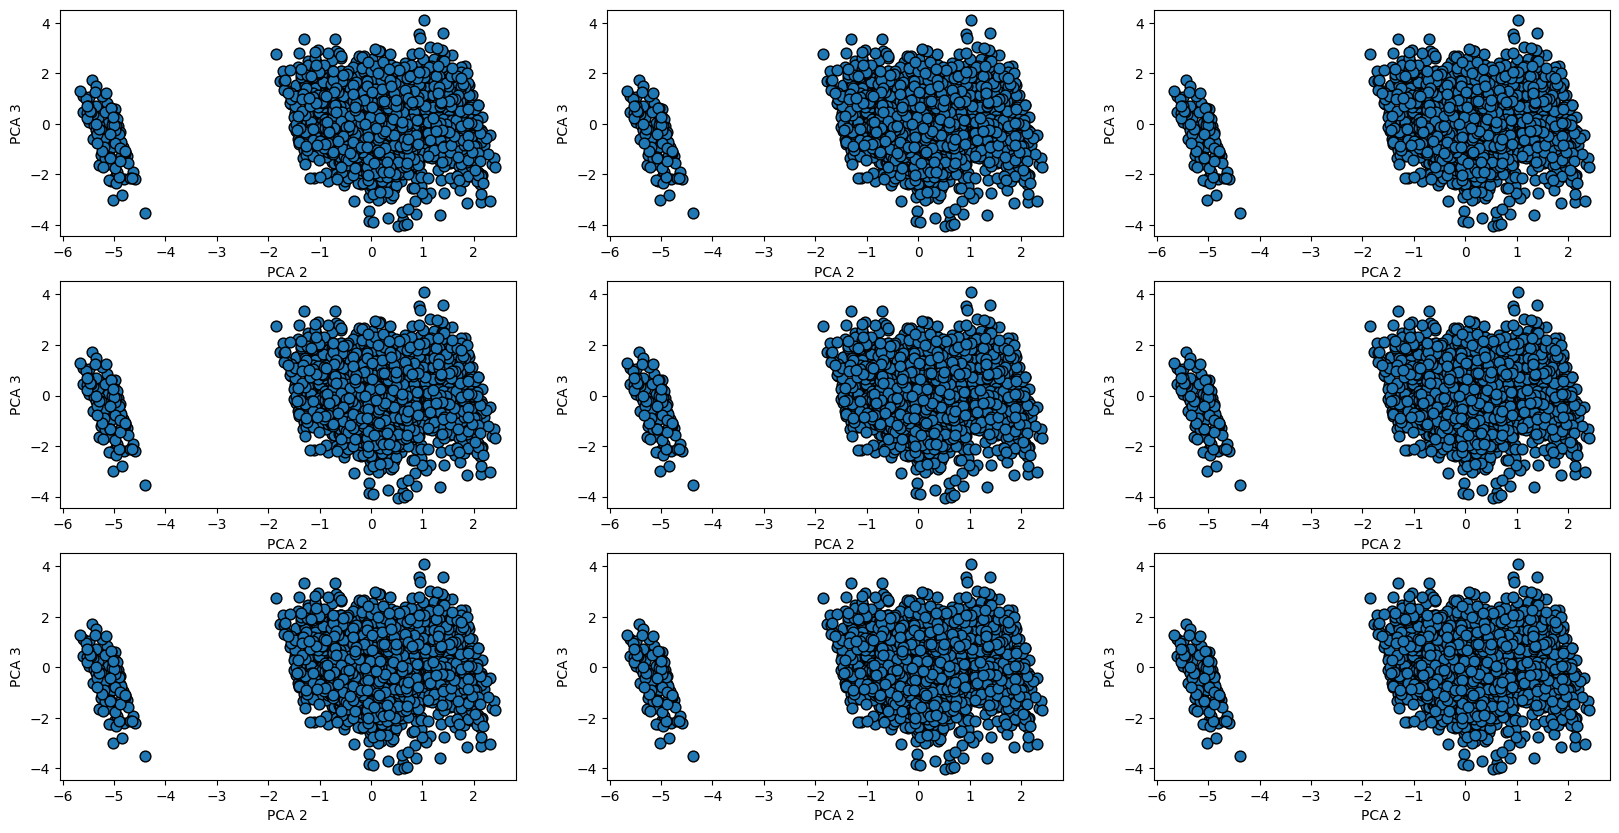

In [19]:
# Lista delle features per cui vogliamo fare gli scatter plot
features = ['length', 'race_prestige', 'race_physical_effort', 'cyclist_bmi', 'cyclist_age', 'height', 'cyclist_climb_power', 'position', 'delta']

# FIXME: fix plot (per qualche motivo con i colori non funziona)

n_plots = len(features)
fig, axes = plt.subplots(3, 3, figsize=(20, 10))  # Una griglia 2x3 di subplots

for i, feature in enumerate(features):
    ax = axes[i // 3, i % 3]  # Posizione nell'array 3x3
 
    scatter = ax.scatter(
        original_and_transformed_dataframe['pca_2'],
        original_and_transformed_dataframe['pca_3'],
        #c=original_and_transformed_dataframe[feature],  # Colora in base alla feature
        cmap='viridis',  # Cambia la palette di colori se necessario
        s=60,  # Dimensione dei punti
        edgecolor='k'  # Bordo dei punti
    )
    ax.set_xlabel('PCA 2')
    ax.set_ylabel('PCA 3')
    
    #fig.colorbar(scatter, ax=ax, label=feature)
plt.show()

/tmp/ipykernel_2737/643751555.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


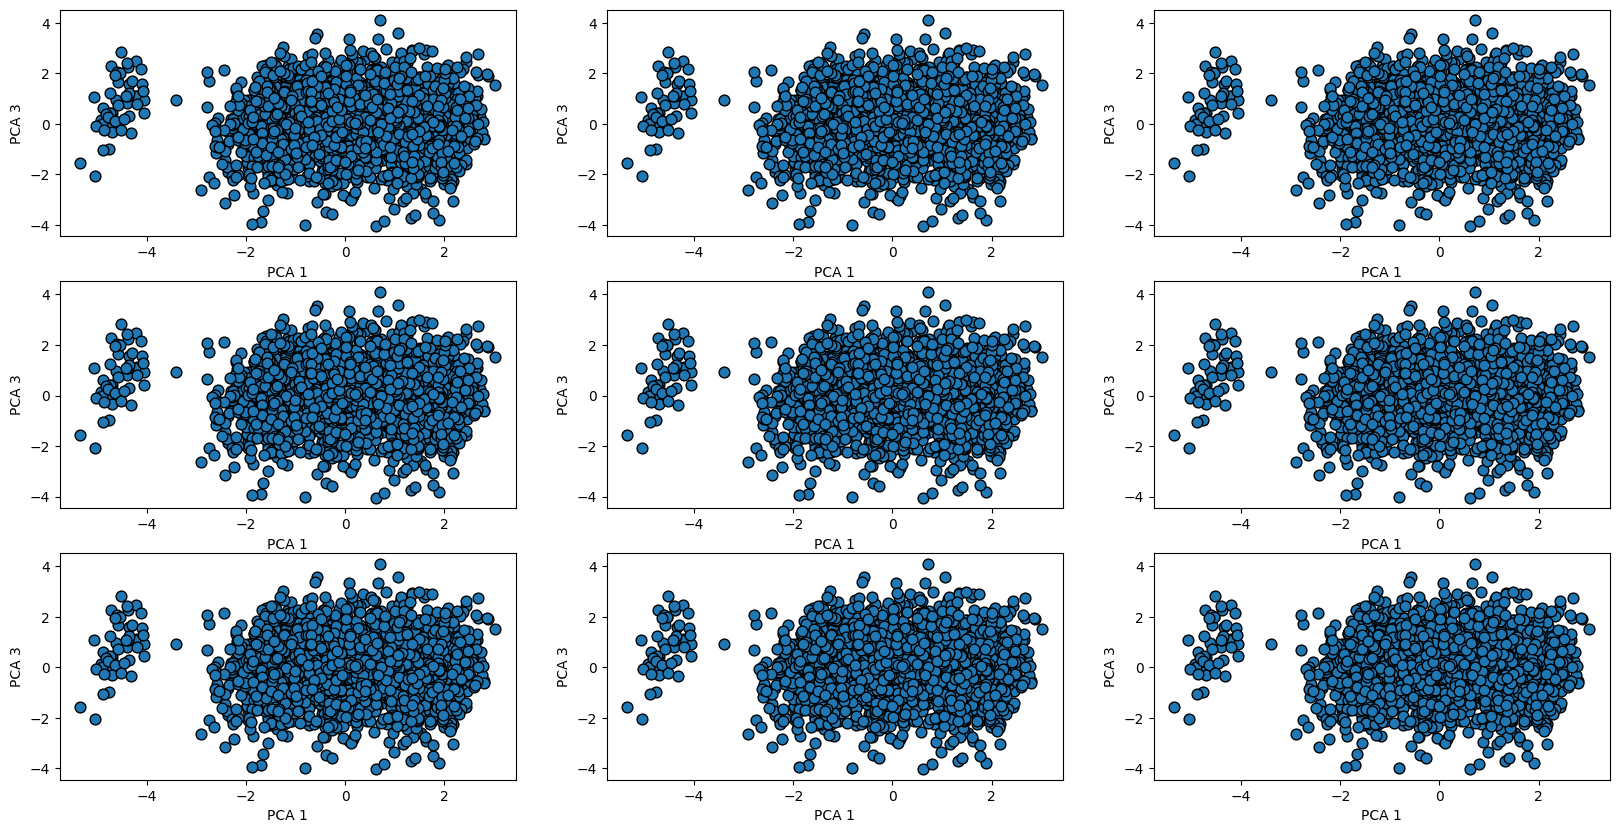

In [20]:
# Lista delle features per cui vogliamo fare gli scatter plot
features = ['length', 'race_prestige', 'race_physical_effort', 'cyclist_bmi', 'cyclist_age', 'height', 'cyclist_climb_power', 'position', 'delta']

# FIXME: fix plot (per qualche motivo con i colori non funziona)

n_plots = len(features)
fig, axes = plt.subplots(3, 3, figsize=(20, 10))  # Una griglia 2x3 di subplots

for i, feature in enumerate(features):
    ax = axes[i // 3, i % 3]  # Posizione nell'array 3x3
 
    scatter = ax.scatter(
        original_and_transformed_dataframe['pca_1'],
        original_and_transformed_dataframe['pca_3'],
        #c=original_and_transformed_dataframe[feature],  # Colora in base alla feature
        cmap='viridis',  # Cambia la palette di colori se necessario
        s=60,  # Dimensione dei punti
        edgecolor='k'  # Bordo dei punti
    )
    ax.set_xlabel('PCA 1')
    ax.set_ylabel('PCA 3')
    
    #fig.colorbar(scatter, ax=ax, label=feature)
plt.show()